# PandasOllama Kütüphanesi Test Notebook'u - Genel CSV Desteği

Bu notebook, PandasOllama kütüphanesinin herhangi bir CSV veri yapısı ile nasıl kullanılacağını göstermektedir.

In [ ]:
# Gerekli kütüphaneleri içe aktar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time  # Zaman ölçümü için
import sys
import os
import warnings

# Uyarıları bastır
warnings.filterwarnings('ignore', category=UserWarning)

# Modülü yükle
module_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# PandasOllama kütüphanesini içe aktar
try:
    from pandas_ollama import MyPandasAI
except ImportError:
    # Try to import as installed package
    from pandas_ollama.core import MyPandasAI

## Diagnostics - Görselleştirme Testi

Aşağıdaki hücre, notebook içinde görselleştirmelerin düzgün çalışıp çalışmadığını kontrol eder.

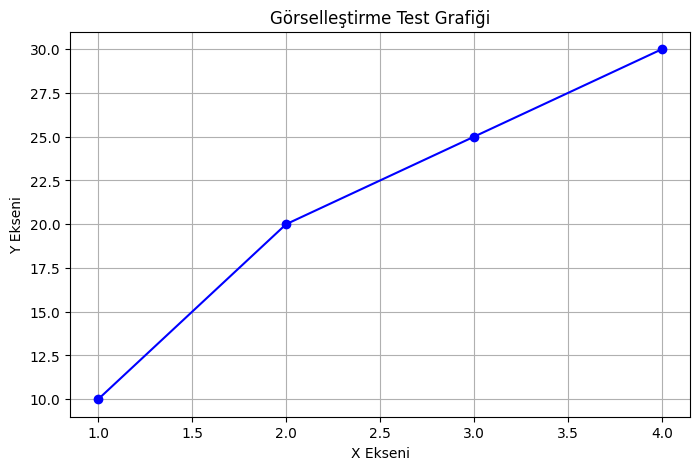

Görselleştirme testi tamamlandı. Grafik görünüyor mu?


In [2]:
# Doğrudan matplotlib ile görselleştirme testi
plt.figure(figsize=(8, 5))
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], 'o-', color='blue')
plt.title('Görselleştirme Test Grafiği')
plt.xlabel('X Ekseni')
plt.ylabel('Y Ekseni')
plt.grid(True)
plt.show()

# Eğer yukarıdaki grafik görünüyorsa, matplotlib çalışıyor demektir.
print('Görselleştirme testi tamamlandı. Grafik görünüyor mu?')

## 1. Örnek Veri Seti Oluşturma - Satış Verileri

Önce basit bir satış verisini test edelim:

In [3]:
# Örnek veri seti - satış verileri
sales_data = {
    'Product': ['Laptop', 'Telefon', 'Tablet', 'Monitör', 'Klavye', 'Mouse', 'Kulaklık', 'Şarj Aleti', 'Kamera', 'Hoparlör'],
    'Category': ['Bilgisayar', 'Telefon', 'Tablet', 'Bilgisayar', 'Bilgisayar', 'Bilgisayar', 'Ses', 'Aksesuar', 'Fotoğraf', 'Ses'],
    'Price': [5000, 7500, 3000, 2000, 500, 250, 1000, 150, 3500, 750],
    'Stock': [45, 120, 78, 30, 200, 250, 80, 300, 25, 50],
    'Rating': [4.5, 4.8, 4.2, 4.0, 3.9, 4.7, 4.1, 3.5, 4.6, 4.3],
    'SaleCount': [250, 380, 120, 85, 290, 320, 150, 400, 60, 95]
}

df_sales = pd.DataFrame(sales_data)
df_sales

,Product,Category,Price,Stock,Rating,SaleCount
0,Laptop,Bilgisayar,5000,45,4.5,250
1,Telefon,Telefon,7500,120,4.8,380
2,Tablet,Tablet,3000,78,4.2,120
3,Monitör,Bilgisayar,2000,30,4.0,85
4,Klavye,Bilgisayar,500,200,3.9,290
5,Mouse,Bilgisayar,250,250,4.7,320
6,Kulaklık,Ses,1000,80,4.1,150
7,Şarj Aleti,Aksesuar,150,300,3.5,400
8,Kamera,Fotoğraf,3500,25,4.6,60
9,Hoparlör,Ses,750,50,4.3,95


In [4]:
# MyPandasAI nesnesi oluştur (satış verileri için)
panoll_sales = MyPandasAI(df_sales, 
                         model="qwen2.5:7b",   # Kullanılacak model
                         timeout=30,              # API çağrısı için zaman aşımı (saniye)
                         max_rows=50,             # Context için max satır sayısı
                         cache_size=20,           # Önbellek büyüklüğü
                         save_history=False       # Geçmiş kaydetme kapalı
                        )

## Veri Analizi - Satış Verileri

### Temel Soru-Cevap - Sonuç Gösterimi İyileştirildi

In [ ]:
# Önbelleği temizle (önceki sonuçları kullanmamak için)
panoll_sales.clear_cache()

# Çalışma süresini ölç
start_time = time.time()

# Basit bir soru sor
result = panoll_sales.ask("Bu veri setindeki ürünlerin ortalama fiyatı nedir?")

# Sonuçları görüntüle
print(f"Sorgu süresi: {time.time() - start_time:.2f} saniye\n")
print(result.content)

In [ ]:
# Daha net ve doğrudan sonuçlar için alternatif sorgu yöntemi
start_time = time.time()

# Doğrudan hesaplama işlemleri için özel sorgu formatı
result = panoll_sales.ask("Veri setindeki ürünlerin ortalama fiyatını hesapla ve sonucu göster")

# Sonuçları görüntüle
print(f"Sorgu süresi: {time.time() - start_time:.2f} saniye\n")
print(result.content)

# Kod kısmını da göster (opsiyonel)
if result.code:
    print("\nKullanılan kod:")
    print(f"```python\n{result.code}\n```")

### Görselleştirme

In [ ]:
# Görselleştirme ile analiz
result = panoll_sales.analyze("Kategorilere göre toplam satış miktarlarını analiz et", viz_type="bar")

# Sonuçları görüntüle
print(result.content)

# Görselleştirmeyi görüntüle
if result.visualization:
    import base64
    from IPython.display import Image
    image_data = base64.b64decode(result.visualization)
    Image(data=image_data)

In [ ]:
# Görselleştirmenin doğru şekilde çalıştığını kontrol et
if result.visualization:
    import base64
    from IPython.display import display, Image
    
    # Base64 verinin uzunluğunu kontrol et
    print(f"Base64 veri uzunluğu: {len(result.visualization)} karakter")
    
    # Alternatif görüntüleme yöntemi
    print("Alternatif görüntüleme yöntemi:")  
    image_data = base64.b64decode(result.visualization)
    display(Image(data=image_data))
    
    # Dosyaya kaydet ve oradan göster
    with open('temp_viz.png', 'wb') as f:
        f.write(image_data)
    print("Görselleştirme 'temp_viz.png' dosyasına kaydedildi.")
    
    # Dosyadan görüntüle
    display(Image(filename='temp_viz.png'))
else:
    print("Görselleştirme verisi bulunamadı!")

### Farklı Görselleştirme Türleri

In [ ]:
# Dağılım grafiği (scatter plot)
result = panoll_sales.plot("Stok miktarı ve satış sayısı arasındaki ilişkiyi göster", viz_type="scatter")

# Görselleştirmeyi görüntüle
if result.visualization:
    import base64
    from IPython.display import display, Image
    image_data = base64.b64decode(result.visualization)
    display(Image(data=image_data))
else:
    print("Görselleştirme verisi bulunamadı!")

In [ ]:
# Histogram
result = panoll_sales.plot("Fiyat dağılımını göster", viz_type="hist")

# Görselleştirmeyi görüntüle
if result.visualization:
    import base64
    from IPython.display import Image
    image_data = base64.b64decode(result.visualization)
    Image(data=image_data)

## 2. Farklı Veri Tipi - Kişisel Bilgiler

Şimdi tamamen farklı bir veri yapısı kullanalım ve kütüphanenin esnekliğini test edelim:

In [ ]:
# Farklı bir veri seti - kişisel bilgiler
personal_data = {
    'Name': ['John Smith', 'Emma Johnson', 'Michael Brown', 'Olivia Davis', 'William Wilson',
             'Sophia Taylor', 'James Anderson', 'Isabella Thomas', 'Robert Jackson', 'Mia White'],
    'Age': [35, 28, 42, 31, 45, 29, 38, 27, 52, 33],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 
             'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose'],
    'Occupation': ['Engineer', 'Teacher', 'Doctor', 'Artist', 'Scientist',
                  'Lawyer', 'Accountant', 'Writer', 'Chef', 'Architect'],
    'Salary': [85000, 52000, 120000, 48000, 95000, 110000, 75000, 65000, 70000, 88000],
    'YearsExperience': [10, 5, 15, 8, 20, 7, 12, 4, 25, 9]
}

df_personal = pd.DataFrame(personal_data)
df_personal

In [ ]:
# MyPandasAI nesnesi oluştur (kişisel veriler için)
panoll_personal = MyPandasAI(df_personal, 
                            model="llama3:latest", 
                            timeout=30, 
                            save_history=False)

In [ ]:
# Farklı veri seti ile analiz
result = panoll_personal.ask("Bu veri setindeki kişilerin ortalama yaşı ve maaşı nedir?")
print(result.content)

In [ ]:
# Veri dönüşümü - farklı veri seti ile
filtered_df = panoll_personal.transform("Maaşı 80000'den fazla olan kişileri göster")
filtered_df

In [ ]:
# Görselleştirme - farklı veri seti ile
result = panoll_personal.plot("Maaşlar ve iş tecrübesi arasındaki ilişkiyi göster", viz_type="scatter")

# Görselleştirmeyi görüntüle
if result.visualization:
    import base64
    from IPython.display import display, Image
    image_data = base64.b64decode(result.visualization)
    display(Image(data=image_data))
else:
    print("Görselleştirme verisi bulunamadı!")

In [ ]:
# Yeni eklenen görselleştirme türlerini test edelim
# Kategorik sütun sayımı (count plot)
result = panoll_personal.plot("Mesleklere göre kişi sayılarını göster", viz_type="count")

if result.visualization:
    import base64
    from IPython.display import display, Image
    image_data = base64.b64decode(result.visualization)
    display(Image(data=image_data))
else:
    print("Görselleştirme verisi bulunamadı!")

In [ ]:
# Kutu grafiği (box plot)
result = panoll_personal.plot("Mesleklere göre maaş dağılımını kutu grafiği ile göster", viz_type="box")

if result.visualization:
    import base64
    from IPython.display import display, Image
    image_data = base64.b64decode(result.visualization)
    display(Image(data=image_data))
else:
    print("Görselleştirme verisi bulunamadı!")

## 4. Tarih-Zaman Sütunları İçeren Verileri Test Etme

Tarih-zaman sütunları içeren veri ile PandasOllama'nın davranışını test edelim:

In [ ]:
# Tarih-zaman içeren veri seti oluşturma
from datetime import datetime, timedelta

base_date = datetime(2023, 1, 1)
dates = [(base_date + timedelta(days=i)).strftime('%Y-%m-%d') for i in range(10)]

sales_date_data = {
    'Product': ['Laptop', 'Telefon', 'Tablet', 'Monitör', 'Klavye', 'Mouse', 'Kulaklık', 'Şarj Aleti', 'Kamera', 'Hoparlör'],
    'Category': ['Bilgisayar', 'Telefon', 'Tablet', 'Bilgisayar', 'Bilgisayar', 'Bilgisayar', 'Ses', 'Aksesuar', 'Fotoğraf', 'Ses'],
    'SaleDate': dates,  # Tarih sütunu
    'Price': [5000, 7500, 3000, 2000, 500, 250, 1000, 150, 3500, 750],
    'SaleCount': [250, 380, 120, 85, 290, 320, 150, 400, 60, 95]
}

df_sales_date = pd.DataFrame(sales_date_data)
df_sales_date

In [ ]:
# Tarih sütunu içeren veri için MyPandasAI oluşturma
print("Tarih sütunu otomatik olarak tespit edilecek ve dönüştürülecek...")
panoll_dates = MyPandasAI(df_sales_date, 
                         model="qwen2.5:7b",
                         timeout=30,
                         save_history=False)

In [ ]:
# Önbelleği temizle (önceki sonuçları kullanmamak için)
panoll_dates.clear_cache()

In [ ]:
# Tarih ile ilgili bir sorgu
result = panoll_dates.ask("Satışların tarihe göre dağılımı nasıl?")
print(result.content)

In [ ]:
# Tarih bazlı görselleştirme - Geliştirilmiş kod temizleme özelliğiyle
result = panoll_dates.plot("Ürünlerin satış tarihlerine göre satış miktarlarını gösteren bir çizgi grafiği oluştur", viz_type="line")

# Görselleştirmeyi görüntüle
if result.visualization:
    import base64
    from IPython.display import display, Image
    image_data = base64.b64decode(result.visualization)
    display(Image(data=image_data))
else:
    print("Görselleştirme verisi bulunamadı!")

## 3. CSV Dosyası Yükleme - Genel Kullanım

Kütüphane, herhangi bir CSV dosyasını yükleyip analiz edebilir:

In [ ]:
# CSV dosyası oluştur (örnek için)
df_sales.to_csv('sales_data.csv', index=False)

# CSV dosyasını yükle
df_from_csv = pd.read_csv('sales_data.csv')
print(f"CSV dosyasından yüklenen veri: {df_from_csv.shape[0]} satır, {df_from_csv.shape[1]} sütun")
df_from_csv.head()

In [ ]:
# CSV'den yüklenen veri için PandasOllama oluştur
panoll_csv = MyPandasAI(df_from_csv, 
                        model="llama3:latest", 
                        timeout=30, 
                        save_history=False)

# CSV verisini analiz et
result = panoll_csv.analyze("Bu veri setindeki stok ve fiyat ilişkisini analiz et", viz_type="scatter")

# Sonuçları görüntüle
print(result.content)

# Görselleştirmeyi görüntüle
if result.visualization:
    import base64
    from IPython.display import display, Image
    image_data = base64.b64decode(result.visualization)
    display(Image(data=image_data))
else:
    print("Görselleştirme verisi bulunamadı!")

## Özet

PandasOllama kütüphanesi, herhangi bir CSV veri yapısı ile çalışabilir:

1. **Veri Yapısı Esnekliği:** Farklı veri yapıları ve sütun isimleri ile çalışabilir
2. **Akıllı Tespit:** Veri türlerini ve ilişkilerini otomatik olarak tanır
3. **Doğal Dil İşleme:** Sorguları anlar ve uygun sütunları seçer
4. **Görselleştirme:** Verinin yapısına uygun görselleştirmeleri otomatik oluşturur
5. **Çoklu Görselleştirme Seçenekleri:** Bar, çizgi, scatter, histogram, kutu, count ve diğer grafik türleri
6. **Tarih-Zaman Sütunları:** Tarih ve zaman içeren sütunları otomatik tespit eder ve uygun formatta dönüştürür
7. **Sonuç Gösterimi:** Hesaplama sonuçlarını net ve açık bir şekilde gösterir
8. **Güvenilir Kod Yürütme:** Markdown biçimindeki LLM yanıtlarını düzgün şekilde temizler ve çalıştırır

Tüm bunlar, çok farklı CSV veri setlerinde bile kütüphanenin doğru çalışmasını sağlar.